In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('atlantis_citizens_final.csv')
df.columns = df.columns.str.strip()


In [3]:
df.head()

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2


In [4]:
df.columns

Index(['Citizen_ID', 'Diet_Type', 'District_Name', 'Occupation',
       'Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy', 'Vehicle_Owned',
       'Work_District', 'Bio_Hash'],
      dtype='object')

In [5]:
df.shape

(15751, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751 entries, 0 to 15750
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Citizen_ID        15751 non-null  object 
 1   Diet_Type         15751 non-null  object 
 2   District_Name     15751 non-null  object 
 3   Occupation        15751 non-null  object 
 4   Wealth_Index      14696 non-null  float64
 5   House_Size_sq_ft  14554 non-null  float64
 6   Life_Expectancy   15137 non-null  float64
 7   Vehicle_Owned     15751 non-null  object 
 8   Work_District     15751 non-null  object 
 9   Bio_Hash          15751 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wealth_Index,14696.0,9529.708628,20502.182375,1000.0,1978.0,3794.5,8951.50,589377.0
House_Size_sq_ft,14554.0,1417.153772,2233.194323,100.0,205.0,477.0,1470.75,10000.0
Life_Expectancy,15137.0,51.913391,16.567063,20.0,40.0,49.0,60.00,110.0


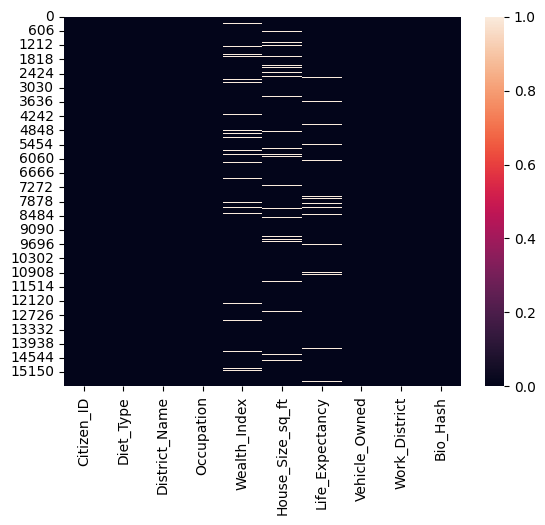

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.isnull().sum()

Citizen_ID             0
Diet_Type              0
District_Name          0
Occupation             0
Wealth_Index        1055
House_Size_sq_ft    1197
Life_Expectancy      614
Vehicle_Owned          0
Work_District          0
Bio_Hash               0
dtype: int64

In [10]:
df.corr(numeric_only=True)

,Wealth_Index,House_Size_sq_ft,Life_Expectancy
Wealth_Index,1.000000,0.761801,0.588095
House_Size_sq_ft,0.761801,1.000000,0.797772
Life_Expectancy,0.588095,0.797772,1.000000


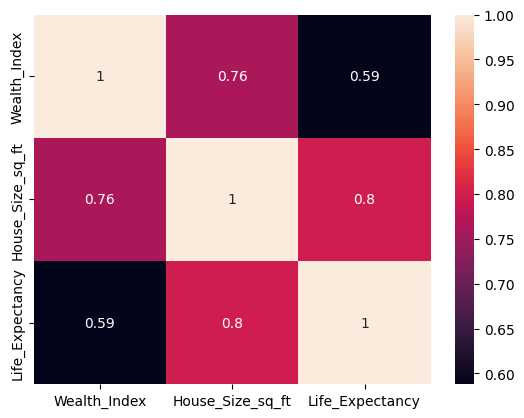

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

##Compare districts based on the highest percentage of
residents who commute out for work? How does this relate to
the occupation of the person?

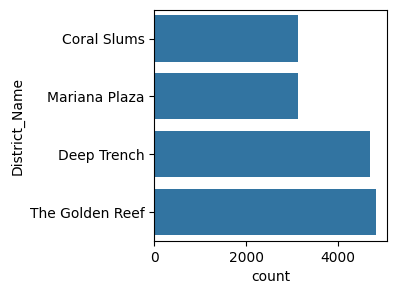

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(y='District_Name',data= df)
plt.show()

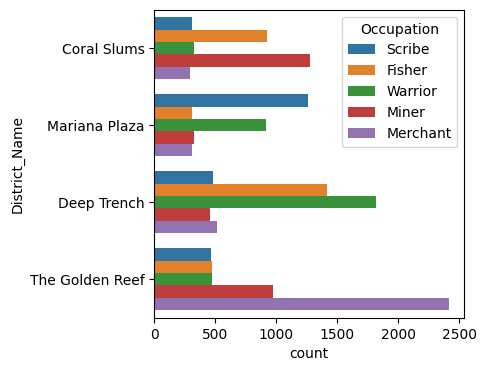

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(y='District_Name',hue='Occupation',data= df)
plt.show()

In [14]:
df.head()

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2


##Compare the wealthiest district to the poorest district.
How many times wealthier is the average citizen in the richest
district compared to the poorest?

In [15]:
district_wealth = df.groupby('District_Name')['Wealth_Index'].mean()

richest = district_wealth.idxmax()
poorest = district_wealth.idxmin()

ratio = district_wealth.max() / district_wealth.min()

richest, poorest, ratio

('The Golden Reef', 'Coral Slums', np.float64(5.554615512839325))

##Is there a significant correlation between House
Size and
Life
Expectancy?

In [16]:
df[['House_Size_sq_ft', 'Life_Expectancy']].corr()


,House_Size_sq_ft,Life_Expectancy
House_Size_sq_ft,1.000000,0.797772
Life_Expectancy,0.797772,1.000000


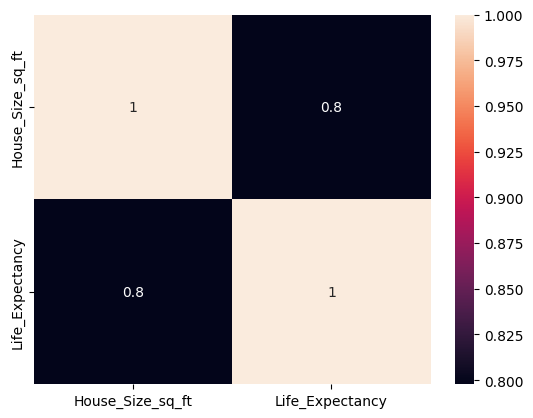

In [17]:
sns.heatmap(df[['House_Size_sq_ft', 'Life_Expectancy']].corr(), annot=True)
plt.show()

###Yes,there is significant correlation

##Does the financial income of a person affect his/her dietary impact?

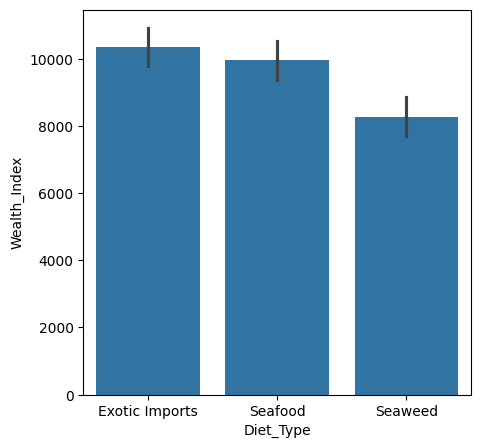

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(x='Diet_Type',y='Wealth_Index',data=df)
plt.show()

In [19]:
df.groupby('Diet_Type')['Wealth_Index'].mean().sort_values(ascending=False)

Diet_Type
Exotic Imports    10366.435328
Seafood            9966.829105
Seaweed            8261.324093
Name: Wealth_Index, dtype: float64

##What is the significance of the bio-hash with respect to the occupation?

In [20]:
df['Bio_Hash'].value_counts()

Bio_Hash
b81cb8ce    1
72f48eef    1
0abde296    1
8055fc9e    1
c77829e2    1
           ..
268659a4    1
ca287a73    1
717ca395    1
34fb8c73    1
ac857e92    1
Name: count, Length: 15751, dtype: int64

In [21]:
df['Bio_Hash'].nunique()
df.groupby('Occupation')['Bio_Hash'].nunique()


Occupation
Fisher      3136
Merchant    3535
Miner       3028
Scribe      2521
Warrior     3531
Name: Bio_Hash, dtype: int64

###Bio_Hash appears to be a unique identifier with no meaningful relationship to occupation and does not provide predictive or analytical value.

##Work District with occupation

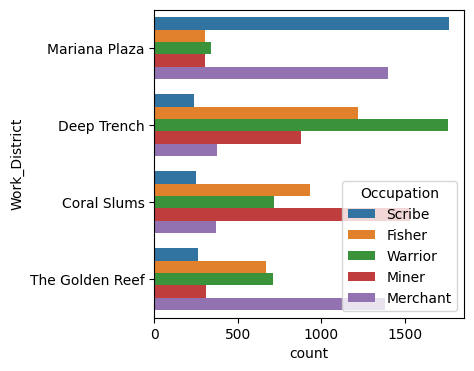

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(y='Work_District',hue='Occupation',data= df)
plt.show()

##Vehicle Analysis with Wealth Index

In [23]:
df.groupby('Vehicle_Owned')['Wealth_Index'].mean()

Vehicle_Owned
Fin Bicycle          6073.819847
No Vehicle           8287.017580
Royal Submarine    168498.883929
Sea Scooter          6368.997100
Submarine           15998.217372
Name: Wealth_Index, dtype: float64

In [24]:
df.groupby('Vehicle_Owned')['Wealth_Index'].mean().idxmax()

'Royal Submarine'

In [25]:
df.groupby('Vehicle_Owned')['Wealth_Index'].mean().idxmin()

'Fin Bicycle'

##Vehicle Analysis with occupation

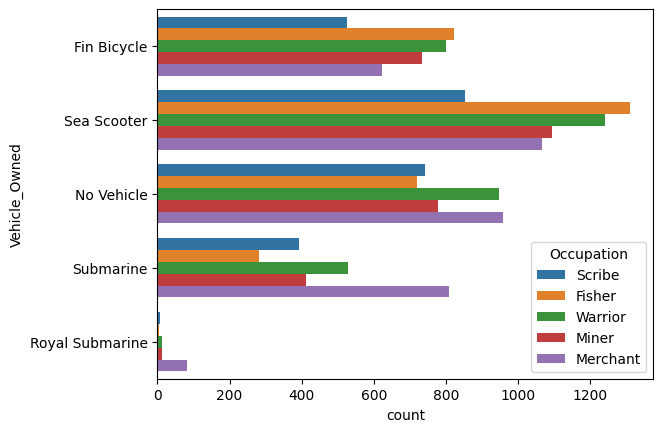

In [26]:
sns.countplot(y='Vehicle_Owned', hue='Occupation', data=df)
plt.show()

##Vehicle and diet analysis

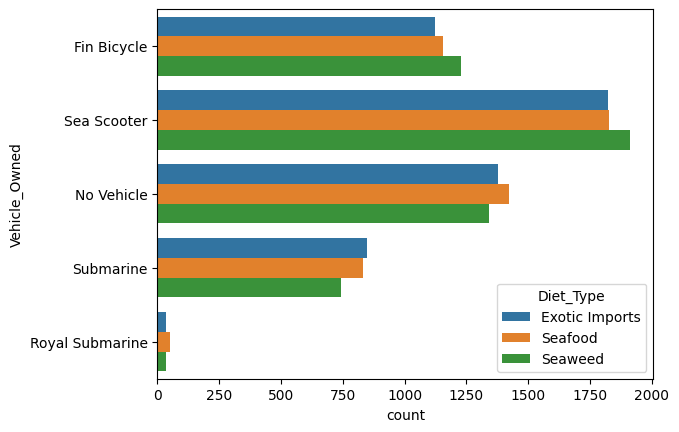

In [27]:
sns.countplot(y='Vehicle_Owned', hue='Diet_Type', data=df)
plt.show()